# Logistic Regression

This notebook contains the first part of the Programming Exercise 2 of the Andrew Ng's course on Coursera.

Implement a classification model using Logistic Regression to predict whether a student gets admitted to a university. We will make the decision based on the score obtained in two exams. We have historical data about the score of students in such two exams and whether they were admitted or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data
import os
data_original = pd.read_csv(os.getcwd() + '/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

## Explore data

In [4]:
data_original.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data_original.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018C79048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018F58048>]], dtype=object)

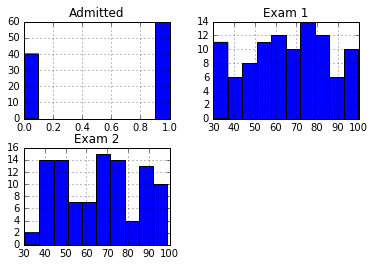

In [6]:
data_original.hist()

In [7]:
# let's separate the two types of classes and explore them separatedly
admitted = data_original[data_original['Admitted']==1]
rejected = data_original[data_original['Admitted']==0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018FB8358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000196ED048>]], dtype=object)

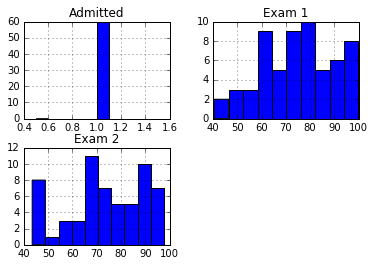

In [8]:
admitted.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000198335F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A95D630>]], dtype=object)

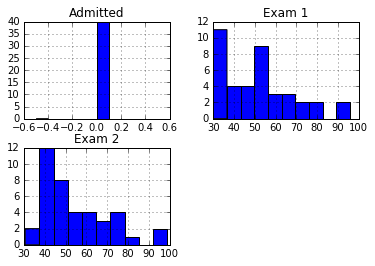

In [9]:
rejected.hist()

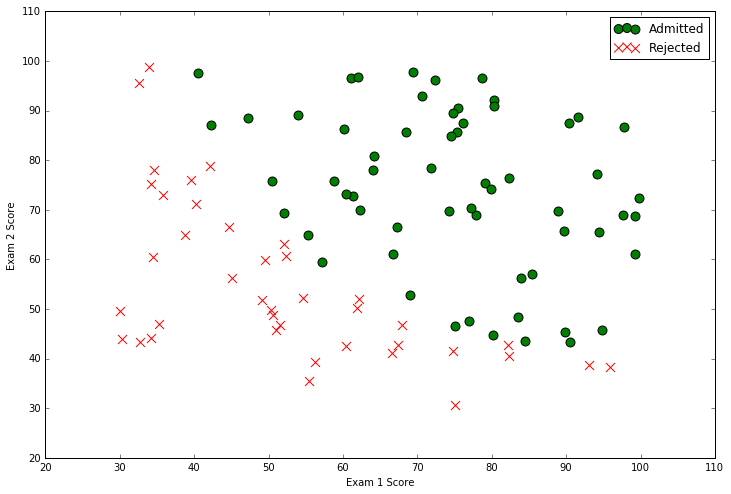

In [10]:
# scatter plot to visualize the data
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(admitted['Exam 1'], admitted['Exam 2'], s=80, c='g', marker='o', label='Admitted')
ax.scatter(rejected['Exam 1'], rejected['Exam 2'], s=80, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

There is a quite clear boundary, so it should be no problem for LogReg to find it

## Implement the model

Let's start by implementing the sigmoif function and making sure it behaves as expected

In [11]:
# function definition
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

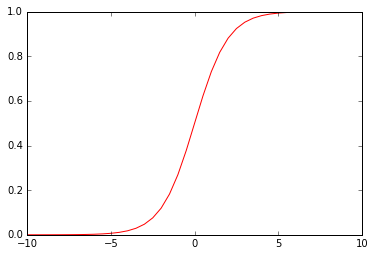

In [12]:
# behavior check
nums = np.arange(-10, 10, step=0.5)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(nums, sigmoid(nums), 'r')

Let's now prepare the data to be used by the LogReg model

In [13]:
# add a ones column - this makes the matrix multiplication work out easier
data = data_original.copy()
data.insert(0, 'Ones', 1)

In [14]:
# set X (training data) and y (target variable)
numCols = data.shape[1]
Xdf = data.iloc[:,0:numCols-1] # all columns except last (iloc allows for an integer-location based indexing)
ydf = data.iloc[:,numCols-1:numCols] # only last column

In [15]:
# convert X,y,theta to np matrices to speed up calculus
# (to arrays because scikit fmin uses ndarrays)
# (we will internally convert to matrices within our cost function)
X = np.array(Xdf.values)
y = np.array(ydf.values)
thetaStart = np.array([0,0,0],dtype=np.float) # initilaized to (0,0,0)

print(X.shape, thetaStart.shape, y.shape)

((100L, 3L), (3L,), (100L, 1L))


Now let's construct the cost function

In [16]:
# define the hypotehsis function
def h(X, theta):
    return sigmoid(X*theta.T)

In [17]:
# cost function
def computeCost(theta, X, y):
    # convert to matrices to use notation of algebra operations
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # compute first and second terms
    first = np.multiply(-y, np.log(h(X, theta)))
    second = np.multiply((1 - y), np.log(1 - h(X, theta)))
    
    return np.sum(first - second) / len(X)

In [18]:
# compute the cost of the initial solution with theta = (0,0,0)
computeCost(thetaStart, X, y)

0.69314718055994529

Now let's implement the gradient algorithm.
Note that we will use SciPy optimization functions to help us with that and we only need to pass them the cost and gradient calulations.

In [75]:
# function that computes the gradient for each theta parameter (single step, not the gradient algorithm)
def computeGradient(theta, X, y):
    # convert to matrices to use notation of algebra operations
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    # init vars
    num_parameters = int(theta.ravel().shape[1])
    gradient = np.zeros(num_parameters)
       
    # compute gradient for each parameter theta
    for i in range(num_parameters):
        term = np.multiply(h(X, theta) - y, X[:,i])
        gradient[i] = np.sum(term) / len(X)
    
    return gradient

In [103]:
from scipy import optimize

# just a helper function to call scipy fmin optimzation function
def optimizeTheta(X, y, theta):
    # using fmin_tnc (we need to pass gradient)
    result = optimize.fmin_tnc(func=computeCost, x0=theta, fprime=computeGradient, args=(X, y))
    return result[0], computeCost(result[0], X, y)    
    
    # using fmin (no need to pass gradient)
    #result = optimize.fmin(computeCost, x0=theta, args=(X, y), maxiter=400, full_output=True)
    #return result[0], result[1]

In [104]:
# And optimize!
thetaFinal, mincost = optimizeTheta(X, y, thetaStart)

In [111]:
# compute the cost of the final solution
print('thetaFinal  => %s' % thetaFinal)
print('computeCost => %f' % computeCost(thetaFinal, X, y))

thetaFinal  => [-25.16131853   0.20623159   0.20147149]
computeCost => 0.203498


We reduced the cost from 0.69 to 0.20...

## Evaluate model

Let's first plot the boundary line in the features 2D space

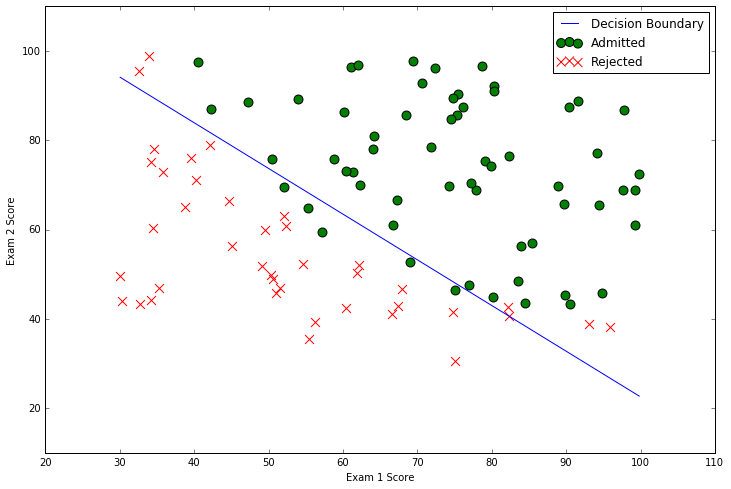

In [106]:
# scatter plot to visualize the data
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(admitted['Exam 1'], admitted['Exam 2'], s=80, c='g', marker='o', label='Admitted')
ax.scatter(rejected['Exam 1'], rejected['Exam 2'], s=80, c='r', marker='x', label='Rejected')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

# plot boundary line
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])]) # get range of exam 1
boundary_ys = (-1./thetaFinal[2])*(thetaFinal[0] + thetaFinal[1]*boundary_xs) # get projections of boundary line
ax.plot(boundary_xs, boundary_ys, '-b', label='Decision Boundary')
ax.legend()

How is the classifier performance in the same training data?

In [107]:
# function to compute the classification prediction
def predict(theta, X):
    # convert to matrices
    X = np.matrix(X)
    theta = np.matrix(theta)
    return [1 if x >= 0.5 else 0 for x in h(X, theta)]

In [108]:
# predict admittance in all training set
predictions = predict(thetaFinal, X)

In [109]:
# compute TP & TN & Accuracy
true_positives = np.sum([1 if (a == 1 and b == 1) else 0 for (a, b) in zip(predictions, y)])
true_negatives = np.sum([1 if (a == 0 and b == 0) else 0 for (a, b) in zip(predictions, y)])

In [110]:
print("Accuracy: %f" % (float(true_positives+true_negatives)/len(predictions)))

Accuracy: 0.890000


89% accuracy... Not bad! But be careful because this is the classification accuracy on out training data. In this exercise we don't have test data.